In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_excel('/Users/pc/Downloads/虹映科技joiisports_outdoor_exercise_data.xlsx')

In [53]:
df['beginTime'].sort_values()

14892   2020-01-01 00:00:09
61161   2020-01-01 00:04:11
41535   2020-01-01 00:09:02
37853   2020-01-01 03:53:36
91939   2020-01-01 05:06:20
                ...        
47308   2020-12-31 22:19:02
29161   2020-12-31 22:23:37
3108    2020-12-31 23:01:22
30210   2020-12-31 23:10:56
11751   2020-12-31 23:22:42
Name: beginTime, Length: 100000, dtype: datetime64[ns]

# all

In [68]:
user_df = df[['userHash', 'duration', 'distance']].groupby('userHash').agg({"duration": ["max", "median", "mean"], "distance": ["max", "median", "mean"]})

In [76]:
user_df.columns.set_levels(['all_duration', 'all_distance'],level=0,inplace=True)

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [77]:
user_df

all_duration                       \
                                          max  median         mean   
userHash                                                             
00150e0217825c0cae62642693f38b9b         3045  1998.0  2099.500000   
001ea1937147abebe3666d3c6de208d3         2677  2324.5  2324.500000   
00225616898a2db23df8d28518ba855e         2424  1471.0  1626.285714   
00281ee35b3f9a6c2992427fb3ae42f3         3211  1163.0  1392.311111   
00285619ea72555441305356c2196d42         3530  2034.0  2093.418182   
...                                       ...     ...          ...   
ffaf1a9168974ab754e82d93cceffc4e         2354  1396.5  1331.750000   
ffc0da8fa03d7a35c031226d43c862c6         2149  1369.0  1386.200000   
ffd4ff175f1409c2765c11e36db556ac         3364  1600.0  1657.535714   
ffe63742962bb0cb277e5d30e2bc2a55         3410  2834.5  2920.166667   
ffe7da7eaaffa91e0de2137dc926735a         3523  2305.0  2222.352941   

                                 all_distance                   
                                          max median      mean  
userHash                                                        
00150e0217825c0cae62642693f38b9b          4.1   1.50  2.040000  
001ea1937147abebe3666d3c6de208d3          4.1   3.55  3.550000  
00225616898a2db23df8d28518ba855e          4.2   3.10  2.742857  
00281ee35b3f9a6c2992427fb3ae42f3          4.0   1.60  1.651111  
00285619ea72555441305356c2196d42          4.0   3.30  3.014545  
...                                       ...    ...       ...  
ffaf1a9168974ab754e82d93cceffc4e          2.6   1.65  1.700000  
ffc0da8fa03d7a35c031226d43c862c6          4.0   3.30  3.420000  
ffd4ff175f1409c2765c11e36db556ac          3.9   1.55  1.882143  
ffe63742962bb0cb277e5d30e2bc2a55          4.1   3.35  3.033333  
ffe7da7eaaffa91e0de2137dc926735a          3.9   1.80  1.970588  

[5082 rows x 6 columns]

# active month

In [5]:
month_df = df[['userHash', 'beginTime', 'duration', 'distance']]

In [249]:
month_df['yearMonth'] = month_df['beginTime'].transform(lambda t: f"{t.year}-{t.month}")

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
month_agg = month_df.groupby(['userHash', 'yearMonth']).agg({'duration': ['count', 'mean'], 'distance': 'mean'})

In [26]:
active_month_mean = month_agg.groupby('userHash').mean()

In [78]:
active_month_mean.columns.set_levels(['active_month_duration', 'active_month_distance'],level=0,inplace=True)

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [81]:
active_month_mean.columns.set_levels(['count_mean', 'mean'],level=1,inplace=True)

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [82]:
active_month_mean

active_month_duration               \
                                            count_mean         mean   
userHash                                                              
00150e0217825c0cae62642693f38b9b                 10.00  2099.500000   
001ea1937147abebe3666d3c6de208d3                  2.00  2324.500000   
00225616898a2db23df8d28518ba855e                  7.00  1626.285714   
00281ee35b3f9a6c2992427fb3ae42f3                 45.00  1392.311111   
00285619ea72555441305356c2196d42                  5.00  2047.980303   
...                                                ...          ...   
ffaf1a9168974ab754e82d93cceffc4e                  2.00  1306.875000   
ffc0da8fa03d7a35c031226d43c862c6                  1.25  1520.375000   
ffd4ff175f1409c2765c11e36db556ac                 14.00  1597.922460   
ffe63742962bb0cb277e5d30e2bc2a55                  3.00  3116.100000   
ffe7da7eaaffa91e0de2137dc926735a                 25.50  2092.656250   

                                 active_month_distance  
                                                  mean  
userHash                                                
00150e0217825c0cae62642693f38b9b              2.040000  
001ea1937147abebe3666d3c6de208d3              3.550000  
00225616898a2db23df8d28518ba855e              2.742857  
00281ee35b3f9a6c2992427fb3ae42f3              1.651111  
00285619ea72555441305356c2196d42              3.023217  
...                                                ...  
ffaf1a9168974ab754e82d93cceffc4e              1.733333  
ffc0da8fa03d7a35c031226d43c862c6              3.475000  
ffd4ff175f1409c2765c11e36db556ac              1.805080  
ffe63742962bb0cb277e5d30e2bc2a55              2.540000  
ffe7da7eaaffa91e0de2137dc926735a              2.171875  

[5082 rows x 3 columns]

# fill empty month

In [65]:
fill_month_agg = month_agg.copy()

for user in month_agg.index.unique(0):
    year_months = month_agg.loc[(user)].index.tolist()
    first_month = int(year_months[0].split('-')[-1])
    fill = {f"2020-{month}" for month in range(first_month + 1, 13)}
    fill = fill - set(year_months)
    fill_index = pd.MultiIndex.from_tuples([(user, year_month) for year_month in fill], names=['userHash', 'yearMonth'])
    fill_df = pd.DataFrame(0, index=fill_index, columns=month_agg.columns)
    fill_month_agg = fill_month_agg.append(fill_df)
    
print(fill_month_agg)

                                           duration               distance
                                              count         mean      mean
userHash                         yearMonth                                
00150e0217825c0cae62642693f38b9b 2020-11         10  2099.500000  2.040000
001ea1937147abebe3666d3c6de208d3 2020-2           2  2324.500000  3.550000
00225616898a2db23df8d28518ba855e 2020-11          7  1626.285714  2.742857
00281ee35b3f9a6c2992427fb3ae42f3 2020-11         45  1392.311111  1.651111
00285619ea72555441305356c2196d42 2020-1           4  1712.250000  2.850000
...                                             ...          ...       ...
ff96c813634606e7d38fe5daf8cc08ac 2020-12          0     0.000000  0.000000
ffaf1a9168974ab754e82d93cceffc4e 2020-12          0     0.000000  0.000000
ffc0da8fa03d7a35c031226d43c862c6 2020-12          0     0.000000  0.000000
ffd4ff175f1409c2765c11e36db556ac 2020-12          0     0.000000  0.000000
ffe7da7eaaffa91e0de2137dc

In [70]:
all_month_mean = fill_month_agg.groupby('userHash').mean()

In [83]:
all_month_mean.columns.set_levels(['filled_month_duration', 'filled_month_distance'],level=0,inplace=True)

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [84]:
all_month_mean.columns.set_levels(['count_mean', 'mean'],level=1,inplace=True)

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [85]:
all_month_mean

filled_month_duration               \
                                            count_mean         mean   
userHash                                                              
00150e0217825c0cae62642693f38b9b              5.000000  1049.750000   
001ea1937147abebe3666d3c6de208d3              1.000000  1162.250000   
00225616898a2db23df8d28518ba855e              3.500000   813.142857   
00281ee35b3f9a6c2992427fb3ae42f3             22.500000   696.155556   
00285619ea72555441305356c2196d42              5.000000  2047.980303   
...                                                ...          ...   
ffaf1a9168974ab754e82d93cceffc4e              1.600000  1045.500000   
ffc0da8fa03d7a35c031226d43c862c6              1.000000  1216.300000   
ffd4ff175f1409c2765c11e36db556ac              9.333333  1065.281640   
ffe63742962bb0cb277e5d30e2bc2a55              3.000000  3116.100000   
ffe7da7eaaffa91e0de2137dc926735a             17.000000  1395.104167   

                                 filled_month_distance  
                                                  mean  
userHash                                                
00150e0217825c0cae62642693f38b9b              1.020000  
001ea1937147abebe3666d3c6de208d3              1.775000  
00225616898a2db23df8d28518ba855e              1.371429  
00281ee35b3f9a6c2992427fb3ae42f3              0.825556  
00285619ea72555441305356c2196d42              3.023217  
...                                                ...  
ffaf1a9168974ab754e82d93cceffc4e              1.386667  
ffc0da8fa03d7a35c031226d43c862c6              2.780000  
ffd4ff175f1409c2765c11e36db556ac              1.203387  
ffe63742962bb0cb277e5d30e2bc2a55              2.540000  
ffe7da7eaaffa91e0de2137dc926735a              1.447917  

[5082 rows x 3 columns]

# active week

In [89]:
week_df = df[['userHash', 'beginTime', 'duration', 'distance']]

In [90]:
week_df['yearWeek'] = week_df['beginTime'].transform(lambda t: t.strftime("%Y-%W"))

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
week_agg = week_df.groupby(['userHash', 'yearWeek']).agg({'duration': ['count', 'mean'], 'distance': 'mean'})

In [93]:
active_week_mean = week_agg.groupby('userHash').mean()

In [95]:
active_week_mean.columns.set_levels(['active_week_duration', 'active_week_distance'],level=0,inplace=True)

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [98]:
active_week_mean.columns.set_levels(['count_mean', 'mean'],level=1,inplace=True)

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [99]:
active_week_mean

active_week_duration               \
                                           count_mean         mean   
userHash                                                             
00150e0217825c0cae62642693f38b9b             3.333333  2157.433333   
001ea1937147abebe3666d3c6de208d3             2.000000  2324.500000   
00225616898a2db23df8d28518ba855e             2.333333  1553.916667   
00281ee35b3f9a6c2992427fb3ae42f3             7.500000  1256.146229   
00285619ea72555441305356c2196d42             1.774194  2024.986022   
...                                               ...          ...   
ffaf1a9168974ab754e82d93cceffc4e             1.142857  1366.857143   
ffc0da8fa03d7a35c031226d43c862c6             1.250000  1520.375000   
ffd4ff175f1409c2765c11e36db556ac             7.000000  1910.231818   
ffe63742962bb0cb277e5d30e2bc2a55             1.200000  2937.300000   
ffe7da7eaaffa91e0de2137dc926735a            10.200000  2237.976264   

                                 active_week_distance  
                                                 mean  
userHash                                               
00150e0217825c0cae62642693f38b9b             1.723333  
001ea1937147abebe3666d3c6de208d3             3.550000  
00225616898a2db23df8d28518ba855e             3.025000  
00281ee35b3f9a6c2992427fb3ae42f3             1.634196  
00285619ea72555441305356c2196d42             3.044516  
...                                               ...  
ffaf1a9168974ab754e82d93cceffc4e             1.721429  
ffc0da8fa03d7a35c031226d43c862c6             3.475000  
ffd4ff175f1409c2765c11e36db556ac             1.901364  
ffe63742962bb0cb277e5d30e2bc2a55             2.850000  
ffe7da7eaaffa91e0de2137dc926735a             2.058154  

[5082 rows x 3 columns]

# fill empty week

In [102]:
fill_week_agg = week_agg.copy()
total_weeks = int(datetime.strptime('2020-12-31', '%Y-%m-%d').strftime("%W"))

for user in week_agg.index.unique(0):
    year_weeks = week_agg.loc[(user)].index.tolist()
    first_week = int(year_weeks[0].split('-')[-1])
    fill = {f"2020-{week}" for week in range(first_week + 1, total_weeks + 1)}
    fill = fill - set(year_weeks)
    fill_index = pd.MultiIndex.from_tuples([(user, year_week) for year_week in fill], names=['userHash', 'yearWeek'])
    fill_df = pd.DataFrame(0, index=fill_index, columns=week_agg.columns)
    fill_week_agg = fill_week_agg.append(fill_df)
    
print(fill_week_agg)

                                          duration         distance
                                             count    mean     mean
userHash                         yearWeek                          
00150e0217825c0cae62642693f38b9b 2020-44         1  2380.0     1.00
                                 2020-45         4  1846.5     1.45
                                 2020-47         5  2245.8     2.72
001ea1937147abebe3666d3c6de208d3 2020-06         2  2324.5     3.55
00225616898a2db23df8d28518ba855e 2020-45         2  1578.0     3.90
...                                            ...     ...      ...
ffe7da7eaaffa91e0de2137dc926735a 2020-50         0     0.0     0.00
                                 2020-52         0     0.0     0.00
                                 2020-51         0     0.0     0.00
                                 2020-48         0     0.0     0.00
                                 2020-49         0     0.0     0.00

[146091 rows x 3 columns]


In [103]:
all_week_mean = fill_week_agg.groupby('userHash').mean()

In [105]:
all_week_mean.columns.set_levels(['filled_week_duration', 'filled_week_distance'],level=0,inplace=True)

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [106]:
all_week_mean.columns.set_levels(['count_mean', 'mean'],level=1,inplace=True)

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [107]:
all_week_mean

filled_week_duration               \
                                           count_mean         mean   
userHash                                                             
00150e0217825c0cae62642693f38b9b             1.111111   719.144444   
001ea1937147abebe3666d3c6de208d3             0.042553    49.457447   
00225616898a2db23df8d28518ba855e             0.875000   582.718750   
00281ee35b3f9a6c2992427fb3ae42f3             4.500000   753.687737   
00285619ea72555441305356c2196d42             0.932203  1063.975706   
...                                               ...          ...   
ffaf1a9168974ab754e82d93cceffc4e             0.296296   354.370370   
ffc0da8fa03d7a35c031226d43c862c6             0.142857   173.757143   
ffd4ff175f1409c2765c11e36db556ac             0.823529   224.733155   
ffe63742962bb0cb277e5d30e2bc2a55             0.666667  1631.833333   
ffe7da7eaaffa91e0de2137dc926735a             5.100000  1118.988132   

                                 filled_week_distance  
                                                 mean  
userHash                                               
00150e0217825c0cae62642693f38b9b             0.574444  
001ea1937147abebe3666d3c6de208d3             0.075532  
00225616898a2db23df8d28518ba855e             1.134375  
00281ee35b3f9a6c2992427fb3ae42f3             0.980518  
00285619ea72555441305356c2196d42             1.599661  
...                                               ...  
ffaf1a9168974ab754e82d93cceffc4e             0.446296  
ffc0da8fa03d7a35c031226d43c862c6             0.397143  
ffd4ff175f1409c2765c11e36db556ac             0.223690  
ffe63742962bb0cb277e5d30e2bc2a55             1.583333  
ffe7da7eaaffa91e0de2137dc926735a             1.029077  

[5082 rows x 3 columns]

# time of day

In [108]:
time_df = df[['userHash', 'beginTime']]

In [110]:
def time_of_day(t):
    midnight = t.replace(hour=0, minute=0, second=0, microsecond=0)
    return (t - midnight).seconds

time_df['time_of_day'] = time_df['beginTime'].transform(time_of_day)

/Users/pc/.local/share/virtualenvs/thirties-f_QitQRK/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [113]:
time_agg = time_df.groupby('userHash').agg({'time_of_day': ["median", "min", "max"]})

In [114]:
time_agg

time_of_day              
                                      median    min    max
userHash                                                  
00150e0217825c0cae62642693f38b9b     53103.0  28376  79578
001ea1937147abebe3666d3c6de208d3     62234.0  60372  64096
00225616898a2db23df8d28518ba855e     64559.0  31910  77067
00281ee35b3f9a6c2992427fb3ae42f3     64784.0  23967  78072
00285619ea72555441305356c2196d42     62233.0  22438  73017
...                                      ...    ...    ...
ffaf1a9168974ab754e82d93cceffc4e     53255.0  42827  64867
ffc0da8fa03d7a35c031226d43c862c6     50579.0  34258  57488
ffd4ff175f1409c2765c11e36db556ac     46732.0   1075  84314
ffe63742962bb0cb277e5d30e2bc2a55     66869.5  46292  81599
ffe7da7eaaffa91e0de2137dc926735a     56036.0  27936  84666

[5082 rows x 3 columns]

# join

In [147]:
join_df = pd.concat([user_df, time_agg, active_month_mean, all_month_mean, active_week_mean, all_week_mean], axis=1)

In [148]:
join_df

all_duration                       \
                                          max  median         mean   
userHash                                                             
00150e0217825c0cae62642693f38b9b         3045  1998.0  2099.500000   
001ea1937147abebe3666d3c6de208d3         2677  2324.5  2324.500000   
00225616898a2db23df8d28518ba855e         2424  1471.0  1626.285714   
00281ee35b3f9a6c2992427fb3ae42f3         3211  1163.0  1392.311111   
00285619ea72555441305356c2196d42         3530  2034.0  2093.418182   
...                                       ...     ...          ...   
ffaf1a9168974ab754e82d93cceffc4e         2354  1396.5  1331.750000   
ffc0da8fa03d7a35c031226d43c862c6         2149  1369.0  1386.200000   
ffd4ff175f1409c2765c11e36db556ac         3364  1600.0  1657.535714   
ffe63742962bb0cb277e5d30e2bc2a55         3410  2834.5  2920.166667   
ffe7da7eaaffa91e0de2137dc926735a         3523  2305.0  2222.352941   

                                 all_distance                  time_of_day  \
                                          max median      mean      median   
userHash                                                                     
00150e0217825c0cae62642693f38b9b          4.1   1.50  2.040000     53103.0   
001ea1937147abebe3666d3c6de208d3          4.1   3.55  3.550000     62234.0   
00225616898a2db23df8d28518ba855e          4.2   3.10  2.742857     64559.0   
00281ee35b3f9a6c2992427fb3ae42f3          4.0   1.60  1.651111     64784.0   
00285619ea72555441305356c2196d42          4.0   3.30  3.014545     62233.0   
...                                       ...    ...       ...         ...   
ffaf1a9168974ab754e82d93cceffc4e          2.6   1.65  1.700000     53255.0   
ffc0da8fa03d7a35c031226d43c862c6          4.0   3.30  3.420000     50579.0   
ffd4ff175f1409c2765c11e36db556ac          3.9   1.55  1.882143     46732.0   
ffe63742962bb0cb277e5d30e2bc2a55          4.1   3.35  3.033333     66869.5   
ffe7da7eaaffa91e0de2137dc926735a          3.9   1.80  1.970588     56036.0   

                                               active_month_duration  ...  \
                                    min    max            count_mean  ...   
userHash                                                              ...   
00150e0217825c0cae62642693f38b9b  28376  79578                 10.00  ...   
001ea1937147abebe3666d3c6de208d3  60372  64096                  2.00  ...   
00225616898a2db23df8d28518ba855e  31910  77067                  7.00  ...   
00281ee35b3f9a6c2992427fb3ae42f3  23967  78072                 45.00  ...   
00285619ea72555441305356c2196d42  22438  73017                  5.00  ...   
...                                 ...    ...                   ...  ...   
ffaf1a9168974ab754e82d93cceffc4e  42827  64867                  2.00  ...   
ffc0da8fa03d7a35c031226d43c862c6  34258  57488                  1.25  ...   
ffd4ff175f1409c2765c11e36db556ac   1075  84314                 14.00  ...   
ffe63742962bb0cb277e5d30e2bc2a55  46292  81599                  3.00  ...   
ffe7da7eaaffa91e0de2137dc926735a  27936  84666                 25.50  ...   

                                 active_month_distance filled_month_duration  \
                                                  mean            count_mean   
userHash                                                                       
00150e0217825c0cae62642693f38b9b              2.040000              5.000000   
001ea1937147abebe3666d3c6de208d3              3.550000              1.000000   
00225616898a2db23df8d28518ba855e              2.742857              3.500000   
00281ee35b3f9a6c2992427fb3ae42f3              1.651111             22.500000   
00285619ea72555441305356c2196d42              3.023217              5.000000   
...                                                ...                   ...   
ffaf1a9168974ab754e82d93cceffc4e              1.733333              1.600000   
ffc0da8fa03d7a35c031226d43c862c6              3.475000              1.000000   


In [150]:
join_df.columns

MultiIndex([(         'all_duration',        'max'),
            (         'all_duration',     'median'),
            (         'all_duration',       'mean'),
            (         'all_distance',        'max'),
            (         'all_distance',     'median'),
            (         'all_distance',       'mean'),
            (          'time_of_day',     'median'),
            (          'time_of_day',        'min'),
            (          'time_of_day',        'max'),
            ('active_month_duration', 'count_mean'),
            ('active_month_duration',       'mean'),
            ('active_month_distance',       'mean'),
            ('filled_month_duration', 'count_mean'),
            ('filled_month_duration',       'mean'),
            ('filled_month_distance',       'mean'),
            ( 'active_week_duration', 'count_mean'),
            ( 'active_week_duration',       'mean'),
            ( 'active_week_distance',       'mean'),
            ( 'filled_week_duration', 'count_m

# preprocess

In [133]:
from sklearn import preprocessing

In [134]:
train_df = preprocessing.scale(train_df)

In [138]:
train_df

array([[ 0.55170902,  0.30558776,  0.45747115, ...,  0.29383615,
         0.50438012, -0.05277393],
       [ 0.12303077,  0.79828555,  0.82038911, ..., -0.60445775,
        -0.89939939, -0.90151916],
       [-0.17168553, -0.48967023, -0.30580868, ...,  0.09534698,
         0.21840832,  0.89977458],
       ...,
       [ 0.92330783, -0.29500556, -0.25540341, ...,  0.05207772,
        -0.53199126, -0.64947431],
       [ 0.97689262,  1.56789005,  1.7811808 , ..., -0.07979052,
         2.41753352,  1.6635382 ],
       [ 1.1085248 ,  0.76885949,  0.6556291 , ...,  3.64713547,
         1.34252148,  0.7206425 ]])

# pca

In [131]:
from sklearn import decomposition

In [135]:
pca = decomposition.PCA()
pca.fit(train_df)
print(pca.explained_variance_)  

[6.39328682e+00 5.31827883e+00 4.02104666e+00 1.84245542e+00
 1.32096244e+00 8.08042483e-01 3.11486592e-01 2.23634928e-01
 2.02329965e-01 1.28589345e-01 1.12071856e-01 8.05319358e-02
 7.08601897e-02 5.99538194e-02 3.12177213e-02 2.26779172e-02
 1.92026843e-02 1.59406931e-02 1.07379248e-02 6.21073449e-03
 4.61409267e-03]


# k-means clustering

In [118]:
from sklearn.cluster import KMeans

In [140]:
kmeans = KMeans(n_clusters=2).fit(train_df)

In [128]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

# plot

In [161]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

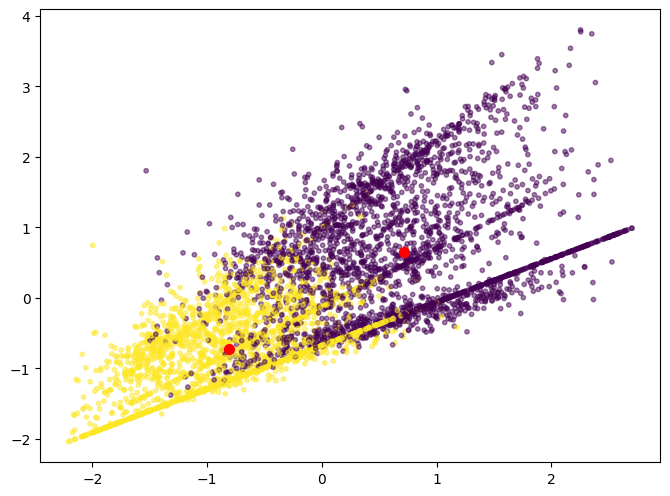

In [162]:
centroids = kmeans.cluster_centers_
plt.scatter(train_df[:, 1], train_df[:, 13], c=kmeans.labels_.astype(float), s=10, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# postprocess

In [164]:
pd.Series(kmeans.labels_)

0       0
1       0
2       1
3       0
4       0
       ..
5077    1
5078    1
5079    0
5080    0
5081    0
Length: 5082, dtype: int32

In [180]:
post_df = df[['userHash', 'beginTime', 'latitude']].sort_values(['userHash', 'beginTime'])

In [181]:
post_df.set_index('userHash', inplace=True)

In [229]:
output = []

for user in post_df.index.unique(0):
    output.append(post_df.loc[[user]].iloc[[-1]])


In [230]:
output_df = pd.concat(output)

In [233]:
output_df['month'] = output_df['beginTime'].transform(lambda t: int(t.month))

In [235]:
def get_location(latitude):
    if latitude > 24.5:
        return '台北'
    elif latitude < 23.2:
        return '高雄'
    else:
        return '線上'

output_df['location'] = output_df['latitude'].transform(get_location)

In [246]:
output_df = output_df.assign(label=pd.Series(kmeans.labels_).values)

In [247]:
output_df

,beginTime,latitude,month,location,label
userHash,,,,,
00150e0217825c0cae62642693f38b9b,2020-11-28 11:26:36,25.09,11,台北,0
001ea1937147abebe3666d3c6de208d3,2020-02-15 17:48:16,25.09,2,台北,0
00225616898a2db23df8d28518ba855e,2020-11-25 21:24:27,25.05,11,台北,1
00281ee35b3f9a6c2992427fb3ae42f3,2020-11-30 08:56:48,25.04,11,台北,0
00285619ea72555441305356c2196d42,2020-12-27 07:55:53,24.96,12,台北,0
...,...,...,...,...,...
ffaf1a9168974ab754e82d93cceffc4e,2020-11-28 15:05:08,24.81,11,台北,1
ffc0da8fa03d7a35c031226d43c862c6,2020-11-28 15:58:08,24.09,11,線上,1
ffd4ff175f1409c2765c11e36db556ac,2020-06-05 23:25:14,24.63,6,台北,0


In [251]:
output_df.to_csv('labeled_data.csv')